In [1]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [9]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.1/124.9 MB 607.9 kB/s eta 0:03:26
   ---------------------------------------- 0.3/124.9 MB 983.0 kB/s eta 0:02:07
   ---------------------------------------- 0.3/124.9 MB 944.1 kB/s eta 0:02:13
   ---------------------------------------- 0.3/124.9 MB 944.1 kB/s eta 0:02:13
   ---------------------------------------- 0.3/124.9 MB 703.7 kB/s eta 0:02:58
   ---------------------------------------- 0.4/124.9 MB 791.2 kB/s eta 0:02:38
   ---------------------------------------- 0.5/124.9 MB 880.6 kB/s eta 0:02

In [11]:
import xgboost as xgb

In [13]:
## Loading Titanic Dataset

In [15]:
train_data=pd.read_csv('Titanic_train_new.csv')

In [17]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
test_data=pd.read_csv('Titanic_test_new.csv')

In [21]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
# Step 2: Calculate the mean of the 'survived' column in the training dataset

In [25]:
mean_survived=train_data['Survived'].mean()

In [27]:
mean_survived

0.3838383838383838

In [31]:
# Step 3: Create the 'survived' column in the test dataset and fill it with the mean
test_data['survived'] = mean_survived

In [35]:
# Step 4: Merge the datasets
df = pd.concat([train_data, test_data], ignore_index=True)


In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.383838
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.383838
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.383838
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.383838


In [41]:
df.head() ## display the merged data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [43]:
df.isnull().sum() ## checking the misssing value

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64

In [45]:
#Separating numerical and categorical columsn from dataset
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [47]:
num_cols

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'survived']

In [49]:

cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [51]:
# Handling missing values nd Apply Encoding techniques.
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [53]:
num_imputer=SimpleImputer(strategy='mean')

In [61]:
num_imputer # Create a SimpleImputer for numerical columns

SimpleImputer()

In [63]:
cat_imputer=SimpleImputer(strategy='most_frequent')

In [65]:
cat_imputer # Create a SimpleImputer for categorical columns

SimpleImputer(strategy='most_frequent')

In [68]:
## apply simple imputer to the numerical columns

In [74]:
df[num_cols]=num_imputer.fit_transform(df[num_cols])
df[num_cols]



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,survived
0,1.0,0.000000,3.0,22.000000,1.0,0.0,7.2500,0.383838
1,2.0,1.000000,1.0,38.000000,1.0,0.0,71.2833,0.383838
2,3.0,1.000000,3.0,26.000000,0.0,0.0,7.9250,0.383838
3,4.0,1.000000,1.0,35.000000,1.0,0.0,53.1000,0.383838
4,5.0,0.000000,3.0,35.000000,0.0,0.0,8.0500,0.383838
...,...,...,...,...,...,...,...,...
1304,1305.0,0.383838,3.0,29.881138,0.0,0.0,8.0500,0.383838
1305,1306.0,0.383838,1.0,39.000000,0.0,0.0,108.9000,0.383838
1306,1307.0,0.383838,3.0,38.500000,0.0,0.0,7.2500,0.383838
1307,1308.0,0.383838,3.0,29.881138,0.0,0.0,8.0500,0.383838


In [76]:
## apply simple imputer to the categorical columns

In [78]:
df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])

In [80]:
df[cat_cols]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,C23 C25 C27,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C23 C25 C27,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,C23 C25 C27,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,C23 C25 C27,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,C23 C25 C27,S
1307,"Ware, Mr. Frederick",male,359309,C23 C25 C27,S


In [82]:
# Apply the SimpleImputer to categorical columns
if cat_cols:  # This ensures the code only runs if there are categorical columns
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
else:
    print("No categorical columns found after initial processing.")

In [84]:
#Apply the LabelEncoder to categorical columns


In [86]:
LE=LabelEncoder()

In [88]:
LE

LabelEncoder()

In [92]:
df[cat_cols]=df[cat_cols].apply(LE.fit_transform)

In [94]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1.0,0.000000,3.0,155,1,22.000000,1.0,0.0,720,7.2500,80,2,0.383838
1,2.0,1.000000,1.0,286,0,38.000000,1.0,0.0,816,71.2833,106,0,0.383838
2,3.0,1.000000,3.0,523,0,26.000000,0.0,0.0,914,7.9250,80,2,0.383838
3,4.0,1.000000,1.0,422,0,35.000000,1.0,0.0,65,53.1000,70,2,0.383838
4,5.0,0.000000,3.0,22,1,35.000000,0.0,0.0,649,8.0500,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,0.383838,3.0,1126,1,29.881138,0.0,0.0,711,8.0500,80,2,0.383838
1305,1306.0,0.383838,1.0,891,0,39.000000,0.0,0.0,834,108.9000,64,0,0.383838
1306,1307.0,0.383838,3.0,1046,1,38.500000,0.0,0.0,872,7.2500,80,2,0.383838
1307,1308.0,0.383838,3.0,1227,1,29.881138,0.0,0.0,579,8.0500,80,2,0.383838


In [96]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
survived       0
dtype: int64

In [98]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1.0,0.000000,3.0,155,1,22.000000,1.0,0.0,720,7.2500,80,2,0.383838
1,2.0,1.000000,1.0,286,0,38.000000,1.0,0.0,816,71.2833,106,0,0.383838
2,3.0,1.000000,3.0,523,0,26.000000,0.0,0.0,914,7.9250,80,2,0.383838
3,4.0,1.000000,1.0,422,0,35.000000,1.0,0.0,65,53.1000,70,2,0.383838
4,5.0,0.000000,3.0,22,1,35.000000,0.0,0.0,649,8.0500,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,0.383838,3.0,1126,1,29.881138,0.0,0.0,711,8.0500,80,2,0.383838
1305,1306.0,0.383838,1.0,891,0,39.000000,0.0,0.0,834,108.9000,64,0,0.383838
1306,1307.0,0.383838,3.0,1046,1,38.500000,0.0,0.0,872,7.2500,80,2,0.383838
1307,1308.0,0.383838,3.0,1227,1,29.881138,0.0,0.0,579,8.0500,80,2,0.383838


In [100]:
## Exploring Data Distributions

In [102]:
# Explore data distributions using histograms and box plots

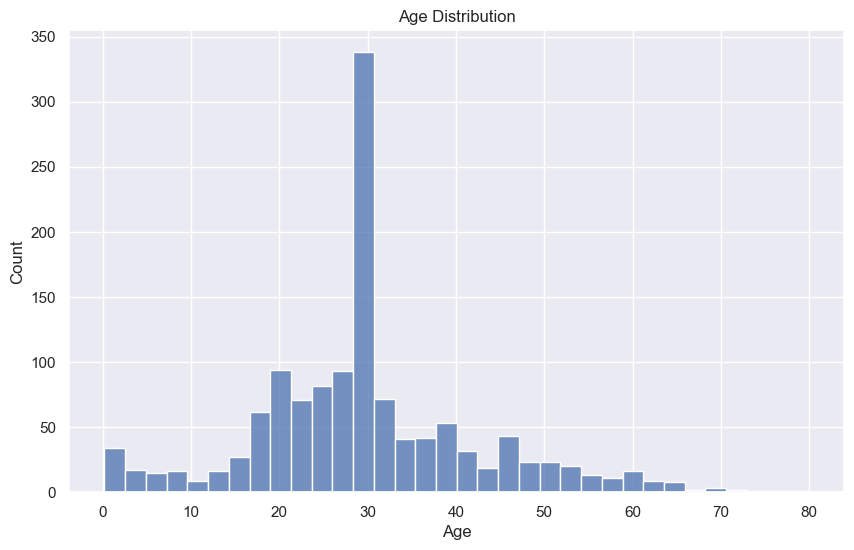

In [104]:
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna())
plt.title('Age Distribution')
plt.show()

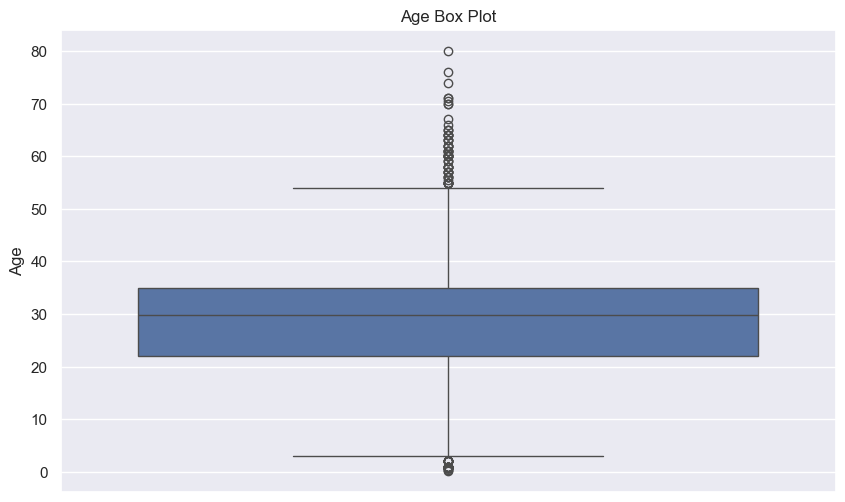

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'].dropna())
plt.title('Age Box Plot')
plt.show()

In [108]:
## Visualizing Relationships between Features and Survival

In [110]:
# Visualize relationships between features and survival using scatter plots and bar plots


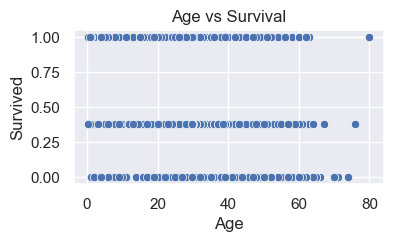

In [112]:
plt.figure(figsize=(4,2))
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title('Age vs Survival')
plt.show()

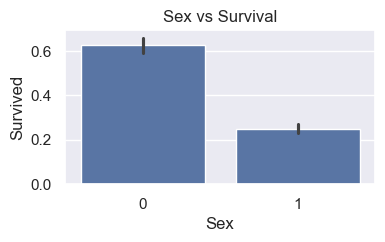

In [114]:
plt.figure(figsize=(4, 2))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Sex vs Survival')
plt.show()

In [116]:
##Building Predictive Models

In [118]:
# Split the preprocessed dataset into training and testing sets
x = df.drop(['Survived'], axis=1)
y = df['Survived']



In [120]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1.0,3.0,155,1,22.000000,1.0,0.0,720,7.2500,80,2,0.383838
1,2.0,1.0,286,0,38.000000,1.0,0.0,816,71.2833,106,0,0.383838
2,3.0,3.0,523,0,26.000000,0.0,0.0,914,7.9250,80,2,0.383838
3,4.0,1.0,422,0,35.000000,1.0,0.0,65,53.1000,70,2,0.383838
4,5.0,3.0,22,1,35.000000,0.0,0.0,649,8.0500,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,3.0,1126,1,29.881138,0.0,0.0,711,8.0500,80,2,0.383838
1305,1306.0,1.0,891,0,39.000000,0.0,0.0,834,108.9000,64,0,0.383838
1306,1307.0,3.0,1046,1,38.500000,0.0,0.0,872,7.2500,80,2,0.383838
1307,1308.0,3.0,1227,1,29.881138,0.0,0.0,579,8.0500,80,2,0.383838


In [122]:
y

0       0.000000
1       1.000000
2       1.000000
3       1.000000
4       0.000000
          ...   
1304    0.383838
1305    0.383838
1306    0.383838
1307    0.383838
1308    0.383838
Name: Survived, Length: 1309, dtype: float64

In [124]:

# Convert y to integer type to represent discrete classes
y = y.astype(int)


In [126]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int32

In [128]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [130]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
772,773.0,2.0,735,0,57.0,0.0,0.0,844,10.5000,172,2,0.383838
543,544.0,2.0,101,1,32.0,1.0,0.0,317,26.0000,80,2,0.383838
289,290.0,3.0,261,0,22.0,0.0,0.0,639,7.7500,80,1,0.383838
10,11.0,3.0,1067,0,4.0,1.0,1.0,839,16.7000,184,2,0.383838
147,148.0,3.0,395,0,9.0,2.0,2.0,924,34.3750,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096.0,2.0,44,1,25.0,0.0,0.0,765,10.5000,80,2,0.383838
1130,1131.0,1.0,342,0,48.0,1.0,0.0,837,106.4250,107,0,0.383838
1294,1295.0,1.0,206,1,17.0,0.0,0.0,35,47.1000,80,2,0.383838
860,861.0,3.0,489,1,41.0,2.0,0.0,546,14.1083,80,2,0.383838


In [132]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
1148,1149.0,3.0,864,1,28.000000,0.0,0.0,586,8.0500,80,2,0.383838
1049,1050.0,1.0,134,1,42.000000,0.0,0.0,4,26.5500,125,2,0.383838
982,983.0,3.0,941,1,29.881138,0.0,0.0,414,7.7750,80,2,0.383838
808,809.0,2.0,792,1,39.000000,0.0,0.0,205,13.0000,80,2,0.383838
1195,1196.0,3.0,766,0,29.881138,0.0,0.0,662,7.7500,80,1,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...
572,573.0,1.0,390,1,36.000000,0.0,0.0,792,26.3875,153,2,0.383838
140,141.0,3.0,140,0,29.881138,0.0,2.0,273,15.2458,80,0,0.383838
1182,1183.0,3.0,292,0,30.000000,0.0,0.0,657,6.9500,80,1,0.383838
312,313.0,2.0,667,0,26.000000,1.0,1.0,223,26.0000,80,2,0.383838


In [134]:

y_train

772     0
543     1
289     1
10      1
147     0
       ..
1095    0
1130    0
1294    0
860     0
1126    0
Name: Survived, Length: 1047, dtype: int32

In [136]:
y_test

1148    0
1049    0
982     0
808     0
1195    0
       ..
572     1
140     0
1182    0
312     0
199     0
Name: Survived, Length: 262, dtype: int32

In [138]:
## Choosing Evaluation Metrics

In [140]:
# Choose appropriate evaluation metrics
evaluation_metrics = [accuracy_score, precision_score, recall_score, f1_score]

In [142]:
evaluation_metrics

[<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>]

In [144]:
##Building LightGBM Model


In [156]:
# Build LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [150]:
##Building XGBoost Model

In [154]:
# Build XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [158]:
## Comparative Analysis

In [162]:
# Evaluate model performance on the testing set
lgb_pred = lgb_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)

lgb_results = [metric(y_test, lgb_pred) for metric in evaluation_metrics]
xgb_results = [metric(y_test, xgb_pred) for metric in evaluation_metrics]

print('LightGBM Results:')
for i, metric in enumerate(evaluation_metrics):
    print(f'{metric.__name__}: {lgb_results[i]}')
print("\nXGBoost Results:")
for i, metric in enumerate(evaluation_metrics):
    print(f'{metric.__name__}: {xgb_results[i]}')

LightGBM Results:
accuracy_score: 0.8625954198473282
precision_score: 0.7846153846153846
recall_score: 0.6986301369863014
f1_score: 0.7391304347826086

XGBoost Results:
accuracy_score: 0.8664122137404581
precision_score: 0.7638888888888888
recall_score: 0.7534246575342466
f1_score: 0.7586206896551724


In [164]:
## Calculate ROC curve and AUC & Plot the ROC curves

In [166]:
from sklearn.metrics import roc_curve, auc

In [172]:
import matplotlib.pyplot as pt

In [174]:

# Calculating ROC curve and AU

In [176]:

# LightGBM
lgb_probs = lgb_model.predict_proba(x_test)[:, 1]
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
lgb_auc = auc(lgb_fpr, lgb_tpr)


In [178]:
lgb_probs

array([1.81793546e-04, 7.31606827e-03, 1.21411288e-04, 9.36592260e-02,
       8.24902559e-04, 3.53823548e-01, 8.31939706e-04, 9.98558602e-01,
       1.84874249e-04, 2.87990434e-01, 6.88005827e-05, 3.02030678e-04,
       7.84328358e-05, 9.42194383e-01, 7.56376634e-05, 9.78599876e-04,
       5.53486241e-04, 2.67163414e-04, 2.63457284e-01, 4.19868128e-04,
       1.95271428e-03, 7.70562833e-03, 1.87697884e-02, 2.37420434e-02,
       9.88133116e-05, 5.38767060e-01, 4.85546572e-01, 1.15825716e-02,
       1.69857068e-04, 8.01310681e-01, 3.84382175e-03, 9.98415266e-01,
       1.66116209e-03, 3.14918868e-03, 1.61420676e-01, 4.23200058e-04,
       7.31954213e-01, 1.12850398e-02, 1.28150209e-03, 6.35977449e-01,
       4.58494102e-01, 7.18612739e-01, 8.17370961e-01, 1.13973357e-04,
       4.18174276e-04, 6.87499928e-05, 1.64427577e-04, 2.67384983e-03,
       8.51560025e-01, 1.59355018e-03, 8.47603913e-01, 9.21219410e-04,
       3.61535875e-03, 9.76891267e-01, 9.96893435e-01, 4.70560837e-02,
      

In [180]:
lgb_fpr

array([0.        , 0.        , 0.        , 0.00529101, 0.00529101,
       0.01058201, 0.01058201, 0.01587302, 0.01587302, 0.02116402,
       0.02116402, 0.02645503, 0.02645503, 0.03174603, 0.03174603,
       0.03703704, 0.03703704, 0.04232804, 0.04232804, 0.04761905,
       0.04761905, 0.06349206, 0.06349206, 0.07407407, 0.07407407,
       0.0952381 , 0.0952381 , 0.1005291 , 0.1005291 , 0.10582011,
       0.10582011, 0.11640212, 0.11640212, 0.12169312, 0.12169312,
       0.12698413, 0.12698413, 0.13756614, 0.13756614, 0.14285714,
       0.14285714, 0.17989418, 0.17989418, 0.18518519, 0.18518519,
       0.24867725, 0.24867725, 0.25925926, 0.25925926, 0.28571429,
       0.28571429, 0.37037037, 0.37037037, 0.43915344, 0.43915344,
       0.49206349, 0.49206349, 0.61375661, 0.61375661, 1.        ])

In [184]:

lgb_tpr

array([0.        , 0.01369863, 0.16438356, 0.16438356, 0.23287671,
       0.23287671, 0.4109589 , 0.4109589 , 0.45205479, 0.45205479,
       0.47945205, 0.47945205, 0.50684932, 0.50684932, 0.52054795,
       0.52054795, 0.5890411 , 0.5890411 , 0.61643836, 0.61643836,
       0.65753425, 0.65753425, 0.68493151, 0.68493151, 0.7260274 ,
       0.7260274 , 0.73972603, 0.73972603, 0.75342466, 0.75342466,
       0.79452055, 0.79452055, 0.80821918, 0.80821918, 0.82191781,
       0.82191781, 0.84931507, 0.84931507, 0.8630137 , 0.8630137 ,
       0.87671233, 0.87671233, 0.89041096, 0.89041096, 0.90410959,
       0.90410959, 0.91780822, 0.91780822, 0.93150685, 0.93150685,
       0.94520548, 0.94520548, 0.95890411, 0.95890411, 0.97260274,
       0.97260274, 0.98630137, 0.98630137, 1.        , 1.        ])

In [186]:
lgb_auc

0.9252011306805827

In [190]:
# XGBoost
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)


In [192]:
xgb_probs

array([2.7325113e-05, 5.3752903e-03, 4.6785804e-05, 3.1662971e-02,
       6.1678345e-04, 2.6230392e-01, 5.5455812e-04, 9.9971431e-01,
       1.4645461e-04, 1.5346107e-01, 3.1129690e-05, 4.6003395e-04,
       2.1391976e-04, 6.5687215e-01, 2.3936486e-04, 1.8317918e-03,
       3.9089069e-04, 1.5785791e-04, 3.1822717e-01, 1.9031042e-03,
       2.3686443e-03, 1.7836798e-02, 3.1650465e-02, 5.6666024e-02,
       2.3902208e-04, 6.6157383e-01, 8.7121123e-01, 6.6640559e-03,
       1.0175988e-04, 7.3875481e-01, 4.5705717e-03, 9.9639928e-01,
       1.1682154e-03, 6.2428939e-04, 6.6108072e-01, 1.6145526e-04,
       8.5894096e-01, 6.7230877e-03, 7.2922983e-04, 9.3940777e-01,
       7.4405587e-01, 6.8769068e-01, 7.7841514e-01, 7.2293697e-05,
       6.3636404e-04, 6.6223758e-05, 6.4429616e-05, 2.6028003e-03,
       9.1099471e-01, 2.5322181e-03, 8.8700193e-01, 2.3749864e-03,
       8.5841911e-03, 9.4175380e-01, 9.9368829e-01, 9.2288911e-02,
       3.0952314e-01, 8.8991797e-01, 2.1880215e-03, 9.7356323e

In [194]:

xgb_fpr

array([0.        , 0.        , 0.        , 0.00529101, 0.00529101,
       0.01058201, 0.01058201, 0.01587302, 0.01587302, 0.02116402,
       0.02116402, 0.02645503, 0.02645503, 0.03174603, 0.03174603,
       0.04761905, 0.04761905, 0.05820106, 0.05820106, 0.06349206,
       0.06349206, 0.06878307, 0.06878307, 0.07936508, 0.07936508,
       0.08465608, 0.08465608, 0.1005291 , 0.1005291 , 0.14814815,
       0.14814815, 0.15873016, 0.15873016, 0.16402116, 0.16402116,
       0.18518519, 0.18518519, 0.2010582 , 0.2010582 , 0.22222222,
       0.22222222, 0.22751323, 0.22751323, 0.23280423, 0.23280423,
       0.2962963 , 0.2962963 , 0.34920635, 0.34920635, 0.48677249,
       0.48677249, 0.53439153, 0.53439153, 0.78835979, 0.78835979,
       1.        ])

In [196]:
xgb_tpr

array([0.        , 0.01369863, 0.06849315, 0.06849315, 0.21917808,
       0.21917808, 0.26027397, 0.26027397, 0.49315068, 0.49315068,
       0.52054795, 0.52054795, 0.53424658, 0.53424658, 0.60273973,
       0.60273973, 0.63013699, 0.63013699, 0.64383562, 0.64383562,
       0.69863014, 0.69863014, 0.71232877, 0.71232877, 0.7260274 ,
       0.7260274 , 0.75342466, 0.75342466, 0.78082192, 0.78082192,
       0.79452055, 0.79452055, 0.83561644, 0.83561644, 0.8630137 ,
       0.8630137 , 0.87671233, 0.87671233, 0.89041096, 0.89041096,
       0.90410959, 0.90410959, 0.91780822, 0.91780822, 0.93150685,
       0.93150685, 0.94520548, 0.94520548, 0.95890411, 0.95890411,
       0.97260274, 0.97260274, 0.98630137, 0.98630137, 1.        ,
       1.        ])

In [200]:

xgb_auc

0.9179531782271508

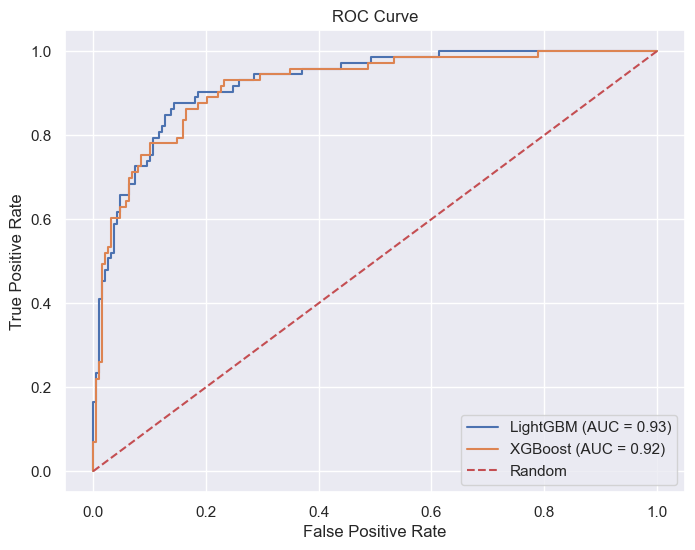

In [202]:
# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()